In [8]:
#Importing dependencies 

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


plt.style.use('ggplot')
%matplotlib inline

In [9]:
#Reading excel file
SalesRevenue = pd.read_excel("C://Users//yedid//Desktop//Project2_Group1//TotalSalesRevenues.xlsx")
SalesRevenue.head()
#Total Sales Tax Revenue is the C107 category from original dataset

,State,Year,Total Sales Tax Revenue
0,Alaska,2008,277033
1,Alaska,2009,250267
2,Alaska,2010,263005
3,Alaska,2011,256014
4,Alaska,2012,248432


In [10]:
#Change data type to numeric for the sales tax column
SalesRevenue['Total Sales Tax Revenue'] = pd.to_numeric(SalesRevenue['Total Sales Tax Revenue']) 

In [11]:
#Store  values for each of the 9 states as variables for plotting
Alaska = SalesRevenue.loc[SalesRevenue['State']=='Alaska']
California = SalesRevenue.loc[SalesRevenue['State']=='California']
Colorado = SalesRevenue.loc[SalesRevenue['State']== 'Colorado']
Maine = SalesRevenue.loc[SalesRevenue['State']=='Maine']
Massachusetts = SalesRevenue.loc[SalesRevenue['State']=='Massachusetts']
Nevada = SalesRevenue.loc[SalesRevenue['State']=='Nevada']
Oregon = SalesRevenue.loc[SalesRevenue['State']=='Oregon']
Vermont = SalesRevenue.loc[SalesRevenue['State']=='Vermont']
Washington = SalesRevenue.loc[SalesRevenue['State']=='Washington']

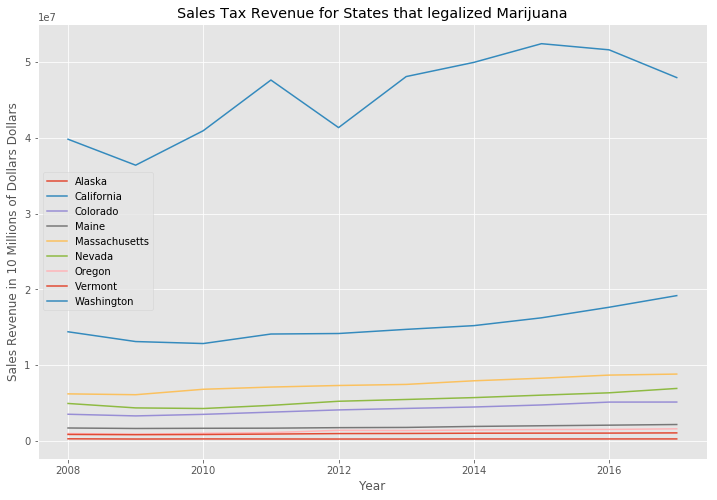

In [12]:
# Plot total sales taxes income (C107) for 9 weed states
%matplotlib inline
plt.figure(figsize=(12,8))
plt.title("Sales Tax Revenue for States that legalized Marijuana")
plt.xlabel('Year')
plt.ylabel('Sales Revenue in 10 Millions of Dollars Dollars')
plt.plot(Alaska['Year'], Alaska['Total Sales Tax Revenue'])
plt.plot(California['Year'], California['Total Sales Tax Revenue'])
plt.plot(Colorado['Year'], Colorado['Total Sales Tax Revenue'])
plt.plot(Maine['Year'], Maine['Total Sales Tax Revenue'])
plt.plot(Massachusetts['Year'], Massachusetts['Total Sales Tax Revenue'])
plt.plot(Nevada['Year'], Nevada['Total Sales Tax Revenue'])
plt.plot(Oregon['Year'], Oregon['Total Sales Tax Revenue'])
plt.plot(Vermont['Year'], Vermont['Total Sales Tax Revenue'])
plt.plot(Washington['Year'], Washington['Total Sales Tax Revenue'])

plt.legend(["Alaska", "California", "Colorado", "Maine", "Massachusetts", "Nevada", "Oregon", "Vermont", "Washington"], loc="best")
plt.savefig("Sales Tax Revenues for States that legalized Marijuana.png")

plt.show()


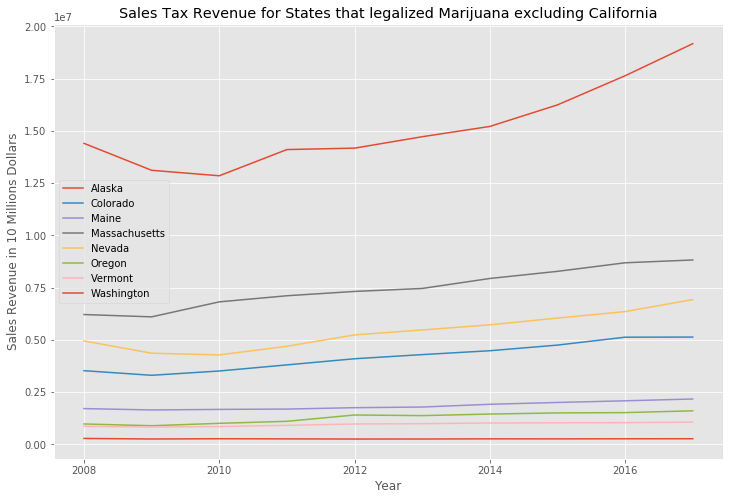

In [13]:
# Plot total taxes income for 8 weed states without California because it is an outlier)
%matplotlib inline
plt.figure(figsize=(12,8))
plt.title("Sales Tax Revenue for States that legalized Marijuana excluding California")
plt.xlabel('Year')
plt.ylabel('Sales Revenue in 10 Millions Dollars')
plt.plot(Alaska['Year'], Alaska['Total Sales Tax Revenue'])
#plt.plot(California['Year'], California['State Sales Tax Revenue'])
plt.plot(Colorado['Year'], Colorado['Total Sales Tax Revenue'])
plt.plot(Maine['Year'], Maine['Total Sales Tax Revenue'])
plt.plot(Massachusetts['Year'], Massachusetts['Total Sales Tax Revenue'])
plt.plot(Nevada['Year'], Nevada['Total Sales Tax Revenue'])
plt.plot(Oregon['Year'], Oregon['Total Sales Tax Revenue'])
plt.plot(Vermont['Year'], Vermont['Total Sales Tax Revenue'])
plt.plot(Washington['Year'], Washington['Total Sales Tax Revenue'])

plt.legend(["Alaska", "Colorado", "Maine", "Massachusetts", "Nevada", "Oregon", "Vermont", "Washington"], loc="best")
plt.savefig("Sales Tax Revenues for States that legalized Marijuana excluding California.png")
plt.show()


In [14]:
# pivot table by year
SalesTax = pd.pivot_table(SalesRevenue, values='Total Sales Tax Revenue', index='Year', columns='State')

SalesTax.head()


State,Alaska,California,Colorado,Maine,Massachusetts,Nevada,Oregon,Vermont,Washington
Year,,,,,,,,,
2008,277033,39807724,3519589,1705306,6206992,4942079,969734,855261,14400668
2009,250267,36381343,3299250,1640671,6096326,4355689,885526,822006,13110784
2010,263005,40933186,3504749,1666914,6813852,4274994,999939,845336,12849019
2011,256014,47616459,3797370,1682645,7106364,4689166,1097023,904068,14103704
2012,248432,41341188,4090645,1748815,7312892,5231962,1398998,968303,14171443


In [15]:
# Year over year percentage change analyses for total sales tax 
SalesTax_change = SalesTax.pct_change()

for i in range(2008,2018):
    print(i)
    percentage_change = SalesTax_change.loc[i]
    print(percentage_change)

2008
State
Alaska          NaN
California      NaN
Colorado        NaN
Maine           NaN
Massachusetts   NaN
Nevada          NaN
Oregon          NaN
Vermont         NaN
Washington      NaN
Name: 2008, dtype: float64
2009
State
Alaska          -0.096617
California      -0.086073
Colorado        -0.062604
Maine           -0.037902
Massachusetts   -0.017829
Nevada          -0.118652
Oregon          -0.086836
Vermont         -0.038883
Washington      -0.089571
Name: 2009, dtype: float64
2010
State
Alaska           0.050898
California       0.125115
Colorado         0.062287
Maine            0.015995
Massachusetts    0.117698
Nevada          -0.018526
Oregon           0.129203
Vermont          0.028382
Washington      -0.019966
Name: 2010, dtype: float64
2011
State
Alaska          -0.026581
California       0.163273
Colorado         0.083493
Maine            0.009437
Massachusetts    0.042929
Nevada           0.096882
Oregon           0.097090
Vermont          0.069478
Washington       0.

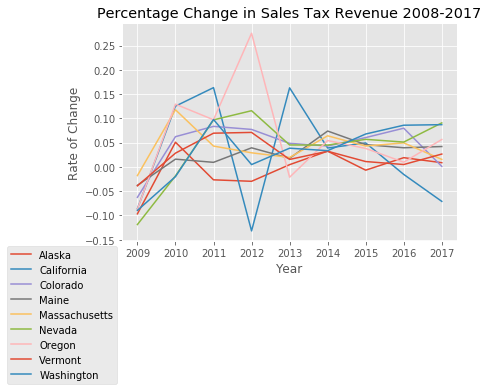

In [16]:
# Plot sales tax percentage change for all states from 2008 to 2017

ax = SalesTax_change.plot(kind = 'line')

plt.legend(bbox_to_anchor=(0, 0))
plt.title("Percentage Change in Sales Tax Revenue 2008-2017")
ax.set_ylabel("Rate of Change")
plt.savefig("PCT Change in Sales Tax Revenue.png")
plt.show()

In [17]:
# # Years in which each ofthe 9 states legalized marijuana for reference
#  Alaska:2014;   California:2016;     Colorado:2012;  
#  Maine: 2016;   Massachusetts:2016;  Nevada:2016;
#  Oregon:2014;   Vermont:2018;        Washington:2012;

Alaska


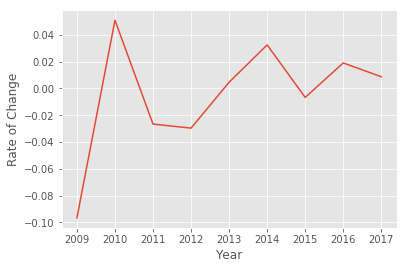

--------------
California


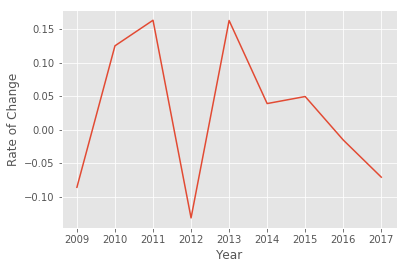

--------------
Colorado


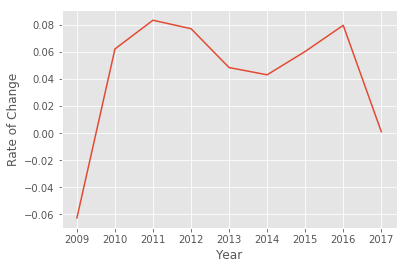

--------------
Maine


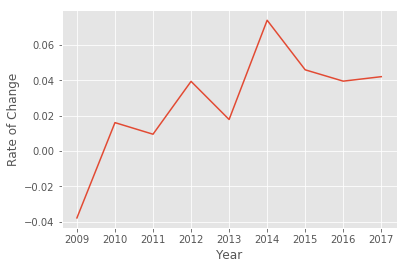

--------------
Massachusetts


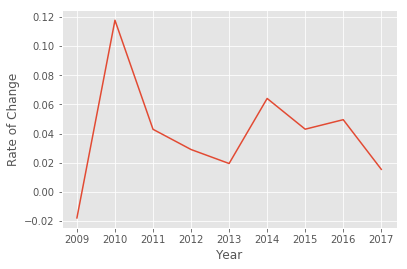

--------------
Nevada


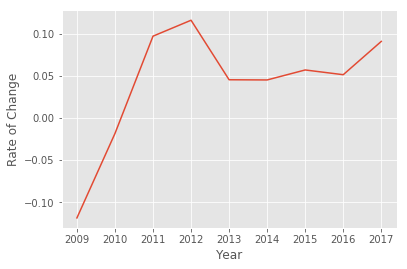

--------------
Oregon


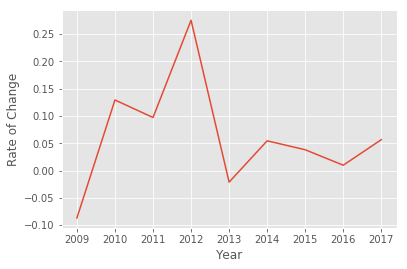

--------------
Vermont


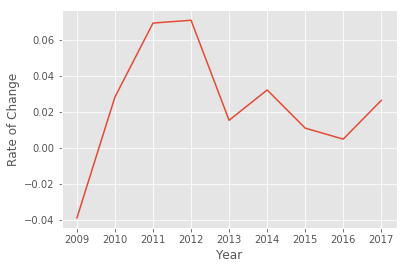

--------------
Washington


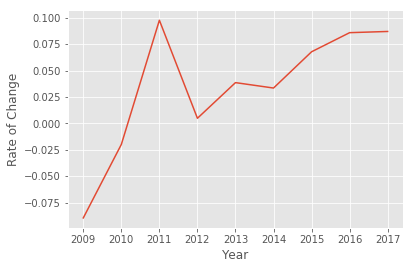

--------------


In [18]:
# Plot sales percentage change for each weed state from 2008 to 2017


for State in SalesTax_change.columns.tolist():
    
        print(State)
        State_percentage = SalesTax_change[State]
        ax = State_percentage.plot(kind='line')
        ax.set_ylabel("Rate of Change")
        plt.show()
        print('--------------')

In [19]:
#Alaska pre-post mean ROC
AK_pre_weed = SalesTax_change["Alaska"].loc[(SalesTax_change.index < 2014)].mean()
AK_post_weed = SalesTax_change["Alaska"].loc[(SalesTax_change.index >= 2014)].mean() 

In [20]:
#California pre-post mean ROC
CA_pre_weed = SalesTax_change["California"].loc[(SalesTax_change.index < 2016)].mean()
CA_post_weed = SalesTax_change["California"].loc[(SalesTax_change.index >= 2016)].mean()

In [21]:
#Colorado pre-post mean ROC
CO_pre_weed = SalesTax_change["Colorado"].loc[(SalesTax_change.index < 2012)].mean()
CO_post_weed = SalesTax_change["Colorado"].loc[(SalesTax_change.index >= 2012)].mean()

In [22]:
#Maine pre-post mean ROC
ME_pre_weed = SalesTax_change["Maine"].loc[(SalesTax_change.index < 2016)].mean()
ME_post_weed = SalesTax_change["Maine"].loc[(SalesTax_change.index >= 2016)].mean()

In [23]:
#MA pre-post mean ROC
MA_pre_weed = SalesTax_change["Massachusetts"].loc[(SalesTax_change.index < 2016)].mean()
MA_post_weed = SalesTax_change["Massachusetts"].loc[(SalesTax_change.index >= 2016)].mean()

In [24]:
#Nevada pre-post mean ROC
NV_pre_weed = SalesTax_change["Nevada"].loc[(SalesTax_change.index < 2016)].mean()
NV_post_weed = SalesTax_change["Nevada"].loc[(SalesTax_change.index >= 2016)].mean()

In [25]:
#Oregon pre-post ROC
OR_pre_weed = SalesTax_change["Oregon"].loc[(SalesTax_change.index < 2014)].mean()
OR_post_weed = SalesTax_change["Oregon"].loc[(SalesTax_change.index >=2014)].mean()

In [26]:
# #Vermont pre-post mean *** Excluded Vermont from analyses because our dataset is until 2017
# VT_pre_weed = SalesTax_change["Vermont"].loc[(SalesTax_change.index < 2018)].mean()
# VT_post_weed = SalesTax_change["Vermont"].loc[(SalesTax_change.index >= 2018)].mean()

In [27]:
#Washington pre-post ROC
WA_pre_weed = SalesTax_change["Washington"].loc[(SalesTax_change.index < 2012)].mean()
WA_post_weed = SalesTax_change["Washington"].loc[(SalesTax_change.index >= 2012)].mean()

In [28]:
#Storing pre-weed legalization ROC means in a list
pre_weed = list(zip([AK_pre_weed, CA_pre_weed, CO_pre_weed, ME_pre_weed, MA_pre_weed, NV_pre_weed, OR_pre_weed, WA_pre_weed])) #list of tuples
pre_weed_ROC = [i[0] for i in pre_weed] #convert to simple list

In [29]:
pre_weed_ROC

[-0.01945413691160931,
 0.04595832529091578,
 0.02772522536616699,
 0.023481203004513222,
 0.04263080825628775,
 0.03177135297637831,
 0.0786945041468509,
 -0.003962812392750759]

In [30]:
#Storing post-weed legalization ROC means in a list
post_weed = list(zip([AK_post_weed, CA_post_weed, CO_post_weed, ME_post_weed, MA_post_weed, NV_post_weed, OR_post_weed, WA_post_weed]))
post_weed_ROC = [i[0] for i in post_weed] #convert to simple list

In [31]:
post_weed_ROC

[0.013390697380947253,
 -0.04321012626644183,
 0.05170537225402516,
 0.04071442926899016,
 0.03250055435391397,
 0.07091681534646177,
 0.03965472761445099,
 0.052916804621086354]

In [32]:

#Wilcoxon signed-rank test
stats.wilcoxon(pre_weed_ROC, post_weed_ROC)

C:\Users\yedid\Miniconda3\envs\PythonData\lib\site-packages\scipy\stats\morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


WilcoxonResult(statistic=14.0, pvalue=0.5754030229127536)

In [33]:
#Paired samples t-test
stats.ttest_rel(pre_weed_ROC, post_weed_ROC)

Ttest_relResult(statistic=-0.2335169376116924, pvalue=0.8220419386836463)